In [25]:
import datetime
from json import JSONDecodeError
import matplotlib.pyplot as plt
import numpy as np
import requests
import tqdm

In [26]:
def get_count(unix_time, lat_max, lat_min, lon_min, lon_max):
    """
    Get coordinates of flights in specified bbox at given time.
    
    This function scrapes data from flightradar24 and returns the coordinates of every flight within the specfied bbox at
    the given unix time.
    ------
    Inputs:
    unix_time: int, time of interest
    lat_max: float (will be rounded to 3 decimal points), maximum latitude of bbox
    lat_min: float, minimum latitude of bbox
    lon_min: float, minimum latitude of bbox
    lon_max: float, maximum latitude of bbox
    
    Returns:
    List of all tuples specifying the coordinates of all the flights
    """
    url = 'https://data-live.flightradar24.com/zones/fcgi/feed.js?faa=1&'
    url += 'bounds={:.3f}%2C{:.3f}%2C{:.3f}%2C{:.3f}'.format(lat_max, lat_min, lon_min, lon_max)
    url += '&satellite=1&mlat=1&flarm=1&adsb=1&gnd=1&air=1&vehicles=1&estimated=1%26maxage%3D14400&gliders=1&stats=1&'
    url += 'prefetch={:d}&history={:d}'.format(unix_time+60, unix_time)
    r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    d = r.json()
    if len(d.keys()) > 3:
        visible_flights = [d[key][1:3] for i, key in enumerate(d.keys()) if 1<i<len(d.keys())-1]
    else:
        vis = d['stats']['visible']['ads-b']
        visible_flights = vis
   # assert len(visible_flights) == d['stats']['visible']['ads-b']
    return visible_flights

In [27]:
# Jeg er dum som et brød, se under ...

# # Given the topography of our site, the bbox of interest is about 200 km diagonally with maximum latitude and maximum longtitude
# # specified below. Here we compute the minimum longtitude and latitude of such bbox.

# R_earth = 6.378e3  # km
# diagonal_length = 200 # km
# side_length = diagonal_length / np.sqrt(2)  # for a square

# lat_max = 39.3864
# lon_max = -113.1708

# # here, the x-axis is at constant latitude and the y-axis is at constant longtitude
# x_max = R_earth * np.cos(lat_max*np.pi/180) * np.cos(lon_max*np.pi/180)  # at y_max
# x_min = x_max - side_length  # at y_max
# lon_min = np.arccos(x_min / (R_earth * np.cos(lat_max*np.pi/180))) * 180/np.pi
# if lon_min > 0:
#     lon_min *= -1  # since cos(-x) = cos(x), make sure to return the negative value

# y_max = R_earth * np.cos(lat_max*np.pi/180) * np.sin(lon_max*np.pi/180)  # at x_max
# y_min = y_max - side_length  # at x_max
# lat_min = np.arccos(y_min / (R_earth * np.sin(lon_max*np.pi/180))) * 180/np.pi

# print(lat_min)
# print(lon_min)
# print(side_length)

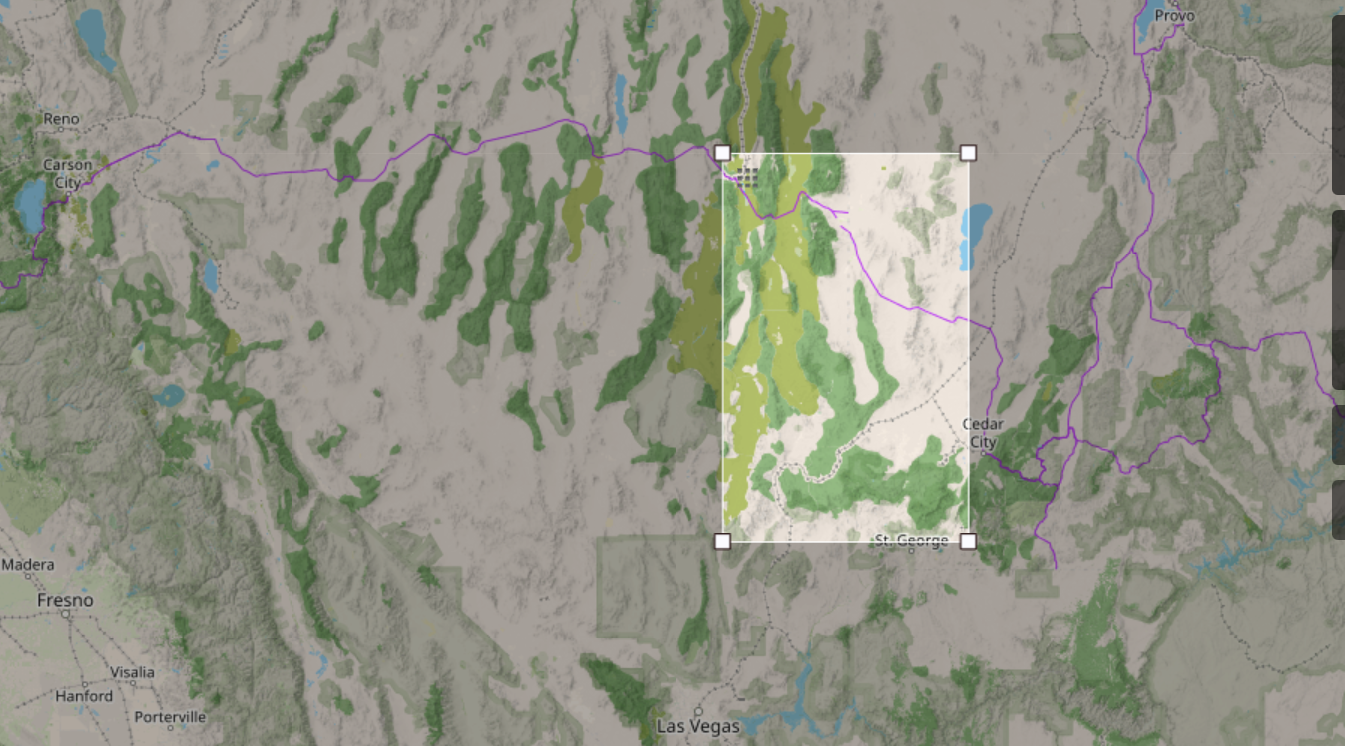

In [28]:
# # Given the topography of our site, the bbox of interest is about 200 km diagonally with maximum latitude and maximum longtitude
# # specified below. Here we compute the minimum longtitude and latitude of such bbox.

# R_earth = 6378  # km
# diagonal_length = 200 # km
# side_length = diagonal_length / np.sqrt(2)  # for a square

# lat_max = 39.3864
# lon_max = -113.1708

# # here, the x-axis is at constant latitude and the y-axis is at constant longtitude
# R_lat_max = R_earth * np.cos(lat_max*np.pi/180)  # radius of circle at max latitude
# delta_lon = side_length / R_lat_max * 180/np.pi  # R*theta = arc length = length of side
# lon_min = lon_max - delta_lon

# R_lon_max = R_earth * np.sin(lon_max*np.pi/180)
# delta_lat = side_length / R_lon_max * 180/np.pi
# lat_min = lat_max + delta_lat

# print(lat_min)
# print(lon_min)
# print(side_length)

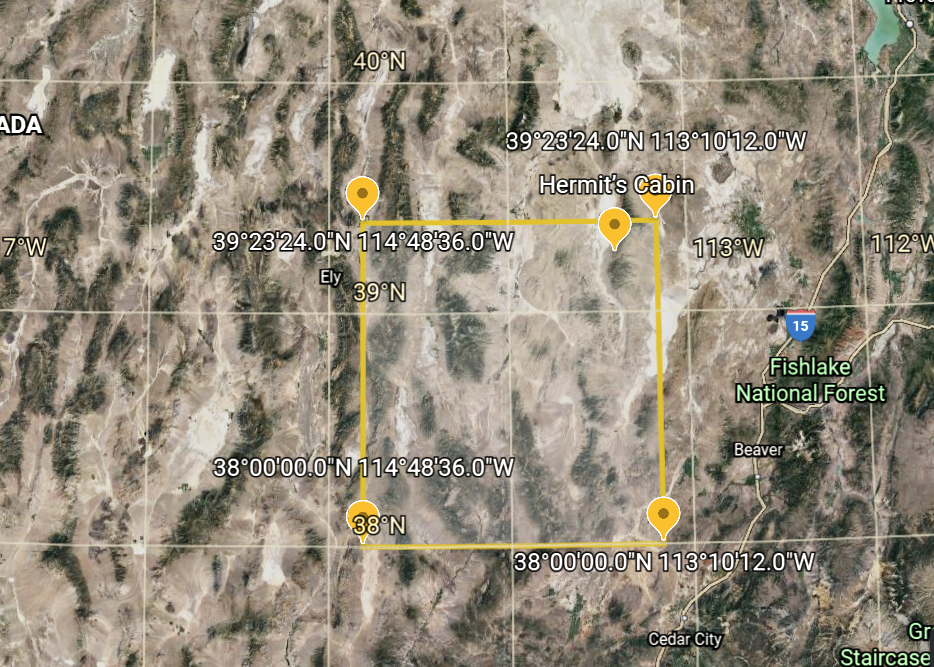

In [29]:
# new coords
lat_max = 39.6024  
lat_min = 37.96033  # new lat min
lon_min = -115.36896
lon_max = -113.09426

Flightradar24 makes data >7 days old unavailable for free users (confirmed on their website).

In [30]:
# get data every half minute for a week back
seconds_per_week = 3600 * 24 * 7
now = datetime.datetime.now()
time_start = int(now.timestamp()) - seconds_per_week
time_res = 30  # seconds
times = [time_start + i * time_res for i in range(seconds_per_week // time_res)]
print(now)

2021-10-19 19:10:14.394021


In [31]:
flights = {}

In [32]:
# call get_count for each time of interest
failed_times = times

for count in range(100):
    print('Enter loop', count)
    todo = failed_times
    failed_times = []
    for t in tqdm.tqdm(todo):
        if t in flights:
            continue
        try:
            d = get_count(t, lat_max, lat_min, lon_min, lon_max)
            flights[t] = flights.get(t, [])+[d]
        except JSONDecodeError:
            print('Failed on t = {}'.format(t))
            failed_times.append(t)
    if len(failed_times) == 0:
        break

Enter loop 0


  4%|███▏                                                                       | 853/20160 [07:41<18:41:49,  3.49s/it]

Failed on t = 1634116574


 11%|████████▎                                                                 | 2263/20160 [21:10<16:38:23,  3.35s/it]

Failed on t = 1634158874


 14%|██████████▏                                                               | 2778/20160 [25:16<17:04:47,  3.54s/it]

Failed on t = 1634174324


 14%|██████████▍                                                               | 2835/20160 [25:48<16:13:25,  3.37s/it]

Failed on t = 1634176034


 17%|████████████▏                                                             | 3335/20160 [29:39<15:45:18,  3.37s/it]

Failed on t = 1634191034


 24%|██████████████████                                                        | 4915/20160 [42:45<14:09:58,  3.35s/it]

Failed on t = 1634238434


 25%|██████████████████▊                                                       | 5126/20160 [44:37<13:54:58,  3.33s/it]

Failed on t = 1634244764


 27%|███████████████████▋                                                      | 5362/20160 [46:45<13:53:33,  3.38s/it]

Failed on t = 1634251844


 29%|█████████████████████▏                                                    | 5775/20160 [50:27<13:36:21,  3.41s/it]

Failed on t = 1634264234


 30%|██████████████████████▎                                                   | 6076/20160 [53:04<13:40:54,  3.50s/it]

Failed on t = 1634273264


 31%|██████████████████████▋                                                   | 6169/20160 [54:00<13:47:07,  3.55s/it]

Failed on t = 1634276054


 31%|███████████████████████▎                                                  | 6335/20160 [55:39<13:03:28,  3.40s/it]

Failed on t = 1634281034


 34%|████████████████████████▋                                               | 6895/20160 [1:00:30<12:26:16,  3.38s/it]

Failed on t = 1634297834


 45%|████████████████████████████████▏                                       | 9019/20160 [1:19:36<10:18:15,  3.33s/it]

Failed on t = 1634361554


 45%|████████████████████████████████▍                                       | 9078/20160 [1:20:29<10:17:17,  3.34s/it]

Failed on t = 1634363324


 46%|████████████████████████████████▊                                       | 9187/20160 [1:21:33<10:25:32,  3.42s/it]

Failed on t = 1634366594


 50%|████████████████████████████████████                                    | 10099/20160 [1:29:01<9:51:54,  3.53s/it]

Failed on t = 1634393954


 51%|████████████████████████████████████▍                                   | 10202/20160 [1:30:08<9:17:43,  3.36s/it]

Failed on t = 1634397044


 56%|████████████████████████████████████████▏                               | 11269/20160 [1:38:45<8:10:26,  3.31s/it]

Failed on t = 1634429054


100%|██████████████████████████████████████████████████████████████████████████| 20160/20160 [2:31:35<00:00,  2.22it/s]


Enter loop 1


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:09<00:00,  1.96it/s]


In [33]:
import pickle
pickle.dump(flights, open('flights.pkl', 'wb'))

In [48]:
for i in range(10, 20):
    print(flights[times[i]])

[[[39.0046, -113.766], [38.2412, -114.1691], [38.2357, -114.2882], [39.2197, -114.8874], [39.0585, -114.4424]]]
[[[39.0046, -113.766], [38.2412, -114.1691], [38.2357, -114.2882], [39.2197, -114.8874], [39.0585, -114.4424]]]
[[[38.9726, -113.8977], [38.2464, -114.303], [38.205, -114.0934], [39.202, -114.7017], [39.1688, -113.1041], [39.5335, -114.8083], [39.0155, -114.5777]]]
[[[38.9726, -113.8977], [38.2464, -114.303], [38.205, -114.0934], [39.202, -114.7017], [39.1688, -113.1041], [39.5335, -114.8083], [39.0155, -114.5777]]]
[[[38.9405, -114.0291], [38.257, -114.4374], [38.1749, -113.9036], [39.1849, -114.5257], [39.1365, -113.2462], [39.4229, -114.7087], [38.9722, -114.7139]]]
[[[38.9405, -114.0291], [38.257, -114.4374], [38.1749, -113.9036], [39.1849, -114.5257], [39.1365, -113.2462], [39.4229, -114.7087], [38.9722, -114.7139]]]
[[[38.9072, -114.1654], [38.2755, -114.5722], [38.1446, -113.71], [39.1654, -114.329], [39.1042, -113.3878], [39.3189, -114.6176], [38.9304, -114.8453]]]
[[

In [53]:
len(flights[times[12]][0])

7

In [54]:
# get the number of flights at each time and store it in a list
flen = []
for t in times:
    if flights[t] == [0]:
        flen.append(0)
    else:
        flen.append(len(flights[t][0]))

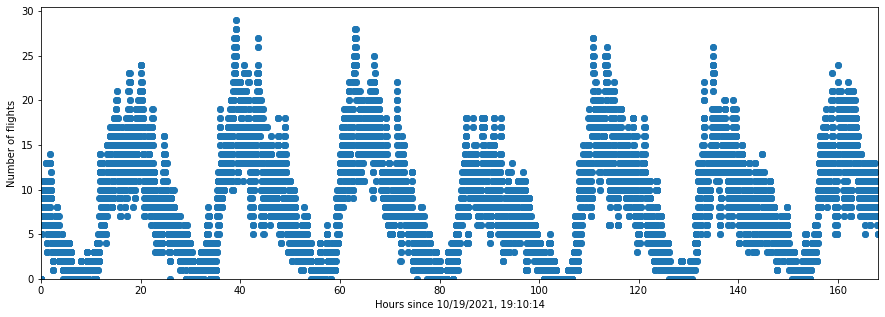

In [147]:
# plot all the data together
plt.figure(figsize=(15,5))
plt.scatter([(t-times[0])/3600 for t in times], flen)
plt.xlabel('Hours since ' + now.strftime("%m/%d/%Y, %H:%M:%S"))
plt.ylabel('Number of flights')
plt.ylim(0)
plt.xlim(0, 168)
#plt.yticks([0, 1, 2, 3])
plt.show()

In [74]:
zeroidx = [i for i in range(len(flen)) if flen[i]==0 ]
print(len(zeroidx))
print(len(zeroidx)/len(flen)*100)

1646
8.16468253968254


In [81]:
flights_on_off = [int(f>0) for f in flen]

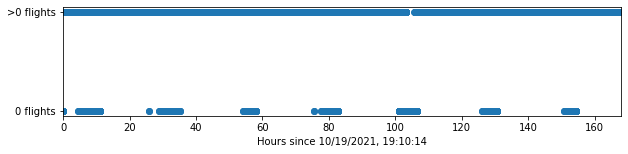

In [103]:
plt.figure(figsize=(10, 2))
plt.scatter([(t-times[0])/3600 for t in times], flights_on_off)
plt.xlabel('Hours since ' + now.strftime("%m/%d/%Y, %H:%M:%S"))
plt.yticks([0, 1], ['0 flights', '>0 flights'])
plt.xlim(0, 168)
plt.show()

In [128]:
zero_lengths = []
i = 0
while i < len(flen):
    f = flen[i]
    if f == 0:
        counter = 1
        for j in range(i+1, len(flen)):
            if flen[j] == 0:
                counter += 1
            else:
                break
        zero_lengths.append((i, counter))
        i += counter
        continue
    else:
        i += 1
        continue

In [140]:
np.mean(zero_lengths_arr[:, 1])

22.86111111111111

In [152]:
zero_lengths_arr = np.array(zero_lengths)
print(zero_lengths_arr[:, 1].sum() == len(zeroidx))
print(zero_lengths_arr[:, 1].mean())
print(zero_lengths_arr[:, 1].std())
print(zero_lengths_arr[:, 1].max())
print(zero_lengths_arr[:, 1].min())
print(np.median(zero_lengths_arr[:, 1]))

True
22.86111111111111
40.24208188353316
288
2
10.0


In [164]:
zero_lengths_arr.shape

(72, 2)

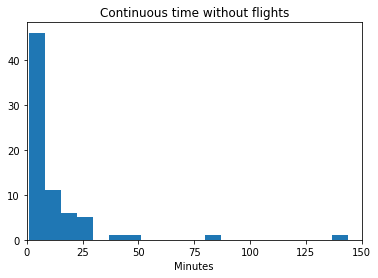

In [163]:
plt.figure()
plt.hist(zero_lengths_arr[:, 1], bins=20)
xticks = np.arange(7)*50
plt.xticks(xticks, [str(x//2) for x in xticks])
plt.xlim(0, 300)
plt.xlabel('Minutes')
plt.title('Continuous time without flights')
plt.show()

In [143]:
print(np.argmax(zero_lengths_arr[:, 1]))

48


In [144]:
zero_lengths_arr[48]

array([12408,   288])

In [148]:
288 * 30 / 60

144.0

In [150]:
datetime.datetime.fromtimestamp(times[12408])

datetime.datetime(2021, 10, 17, 2, 34, 14)

Let's bin together flights arriving in the same time interval at different days.

In [63]:
# reshape flen to an array where each row is a different day and each column is a different time of the day
no_flights = np.empty((7, len(flen)//7))
for i in range(7):
    row = flen[i*len(flen)//7:(i+1)*len(flen)//7]  # day of data
    no_flights[i] = row

In [64]:
# compute avg and std across days
binned_flights = np.mean(no_flights, axis=0)
sd_dev = np.std(no_flights, axis=0)

# find the time in hours that the first request was made
start_time = datetime.datetime.fromtimestamp(times[0])
start_time_h = start_time.hour + start_time.minute/60 + start_time.second/3600
print(start_time_h)

19.170555555555556


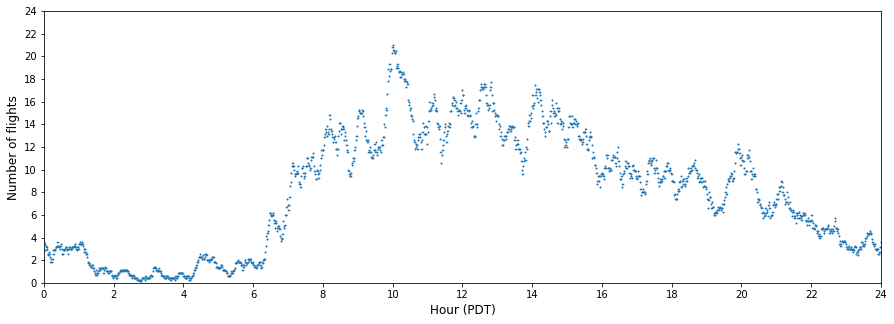

In [66]:
# plot the binned data
plt.figure(figsize=(15,5))
#plt.errorbar([(t-times[0])/3600 for t in times[:len(flen)//7]], binned_flights, yerr=sd_dev/np.sqrt(7), fmt='.')
plt.scatter((np.array([(t-times[0])/3600 for t in times[:len(flen)//7]])+start_time_h) % 24, binned_flights, s=0.5)
plt.xlabel('Hour (PDT)', fontsize=12)
plt.ylabel('Number of flights', fontsize=12)
plt.ylim(0)
plt.xlim(0, 24)
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
plt.savefig('flights_marjum.png')
plt.show()

In [118]:
# indices with >0 flights in flen
flight_indices = [i for i, x in enumerate(flen) if x>0]

In [119]:
len(flight_indices)/len(flights) * 100  # % time with a flight

87.34126984126985

In [120]:
# save the data
np.save('flights_smaller_box.npy', flights, allow_pickle=True)
np.save('times_smaller_box.npy', times, allow_pickle=True)

C:\Python39\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [133]:
peak_time = times[np.argmax(flen)]
peak_time_dt = datetime.datetime.fromtimestamp(peak_time)
print(peak_time_dt)

2021-10-14 14:46:05


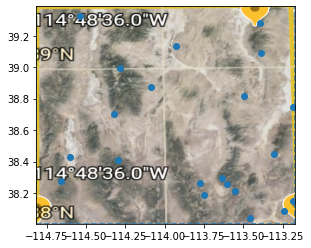

In [143]:
# plot all the flights for the first day on the map (colors are arbitrary)
map_fig = plt.imread('bbox_for_planes2.png')
map_box = [lon_min, lon_max, lat_min, lat_max]
plt.figure()
plt.imshow(map_fig, extent=map_box)
lons = np.array(flights[np.argmax(flen)])[:, 1]
lats = np.array(flights[np.argmax(flen)])[:, 0]
plt.scatter(lons, lats, alpha=1)
plt.axhline(lat_min, ls='--')
plt.axhline(lat_max, ls='--')
plt.axvline(lon_min, ls='--')
plt.axvline(lon_max, ls='--')
plt.savefig('flights_map_marjum.png')
plt.show()

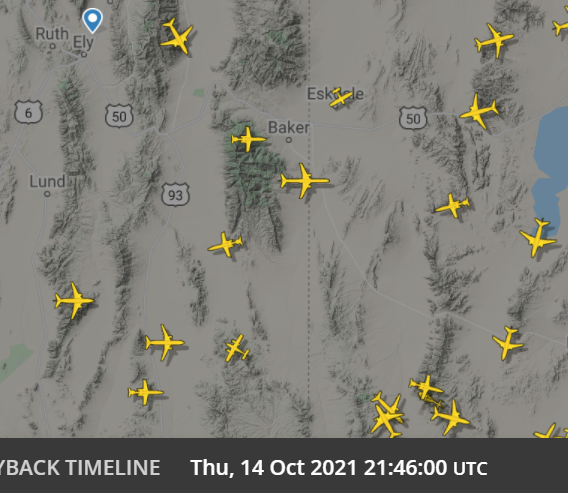